In [ ]:
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<div align="right">
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
</div>

# Optimising Your Finances: OCBC vs. UOB vs. MayBank
For 10 years now, I have parked my money in an OCBC 360 account, assuming that it consistently offered the most competitive rates. I am sure many of you would have done the same. Given that OCBC will be changing its policy from this November, a re-optimisation of our bank accounts is timely. 
  
Today, banks are competing to be your "personal" banker. They want you to use them for all your essential transactions:  
  
1. Safekeeping of monthly salary
2. Paying bills
3. Spending future income (credit)
  
To attract your business, they offer bonus interest on your savings when you make any (or a few) of the above transactions under their account. The more criteria you fulfill, the more generous the interest rates. Thus, as a general principle, **stick to a single bank for as many transactions as possible**. The million dollar question is: which bank? In this post, I review the deals offered by OCBC's 360 account, UOB's One account, and MayBank's SaveUp account and recommend an optimal savings account for you, depending on your monthly transactions.

In [1]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import warnings

# Settings
%matplotlib inline
warnings.filterwarnings('ignore')

# Meet the Contenders
First, I summarise the deals offered by OCBC, UOB, and Maybank.

## OCBC 360 Account
The 360 account offers the following with effect from 1 Nov 2018:  
  
| Action                                    | First \$35,000     | \$35,001 to \$70,000 |
|-------------------------------------------|--------------------|----------------------|
| Base Interest                             | 0.05%              | 0.05%                |
| Credit Salary via GIRO                    | 1.20%              | 1.50%                |
| Spend \\$500 on OCBC Credit Cards           | 0.30%              | 0.60%                |
| Insure or Invest with OCBC                | 0.60%              | 1.20%                |
| Increase Monthly Account Balance by \$500 | 0.30%              | 0.60%                |
| Increase Monthly Account Balance          | 1.00% on Increment | 1.00% on Increment   |
| Maintain Balance of \$200,000 & Above      | 1.00%              | 1.00%                |  
  
*Source: [MoneySmart](https://blog.moneysmart.sg/savings-accounts/ocbc-360-account-review/)*

## UOB One Account
UOB offers the following:  
  
![](https://www.uob.com.sg/web-resources/common/images/column-tiles/rates-table.jpg)

*Source: [UOB](https://www.uob.com.sg/personal/save/chequeing/one-account.page)*

## MayBank SaveUp Account
The SaveUp account pays a base interest of 0.3125%
  
| Action                 | Up to \\$60,000 |   |
|------------------------|---------------|---|
| Base Interest          | 0.3125%       |   |
| 1 Product or Service   | 0.30%         |   |
| 2 Products or Services | 0.80%         |   |
| 3 Products or Services | 2.75%         |   |  
  
The products and services include:  
  
1. Spend \$500 on the Platinum Visa Card or Horizon Visa Signature Card
2. Bill payments of \$300 by GIRO
3. Minimum \$2,000 salary credited via GIRO
4. Minimum education loan of \$10,000
5. Minimum hire purchase loan of \$35,000
6. Minimum home loan of \$200,000
7. Life insurance with a minimum annual premium of \$5,000
8. Renovation loan of \$10,000
9. Minimum monthly investment of \$300 or minimum \$30,000 investment  
  
*Source: [MayBank](http://info.maybank2u.com.sg/saveup/)*

## The Competing Demands
In summary, the competing demands are:  
  
| Transaction  | OCBC | UOB      | MayBank |
|--------------|------|----------|---------|
| Salary       | Yes  | Optional | Yes     |
| GIRO         | No   | Optional | Yes     |
| Credit Cards | Yes  | Yes      | Yes     |  
  
We will find this useful once we calculate the interest rates offered by the three banks.

# Yield Curve
In this section, I compute the "yield curves" for the three banks with the assumption that you are able to capture the full bonus interest from performing all three of the abovementioned transactions under each bank account, separately.
  
## OCBC 360 Account
First, we set up a table with savings of \$2,000 to \$90,000:  

In [3]:
# Set up table
ocbc = pd.DataFrame(np.arange(2000, 91000, 1000), columns = ['savings'])

Next, assuming we (1) credit our salary, (2) spend \$500 on OCBC credit cards, and (3) increase our monthly balance, we compute the interest for each level of savings.

In [4]:
# Compute base interest
ocbc['base_interest'] = ocbc.savings * 0.0005

# Set up columns for bonus interest
ocbc['salary'] = 0
ocbc['credit_cards'] = 0
ocbc['monthly_balance'] = 0
ocbc['thresh0'] = 0
ocbc['thresh1'] = 35000
ocbc['thresh2'] = 70000
ocbc['diff'] = ocbc.savings - ocbc.thresh1
ocbc['diff'] = ocbc[['thresh0', 'diff']].copy().max(axis = 1)
ocbc['diff2'] = ocbc.savings - ocbc.thresh2
ocbc['diff2'] = ocbc[['thresh0', 'diff2']].copy().max(axis = 1)

# Compute interest for salary
ocbc.salary = ocbc[['savings', 'thresh1']].min(axis = 1) * 0.012 + \
    ocbc[['thresh1', 'diff']].min(axis = 1) * 0.015 + \
    ocbc.diff2 * 0.0005

# Compute interest for credit cards
ocbc.credit_cards = ocbc[['savings', 'thresh1']].min(axis = 1) * 0.003 + \
    ocbc[['thresh1', 'diff']].min(axis = 1) * 0.006 + \
    ocbc.diff2 * 0.0005

# Compute interest for monthly balance
ocbc.monthly_balance = ocbc[['savings', 'thresh1']].min(axis = 1) * 0.003 + \
    ocbc[['thresh1', 'diff']].min(axis = 1) * 0.006 + \
    ocbc.diff2 * 0.0005

# Compute total interest
ocbc['total_interest'] = ocbc.base_interest + ocbc.salary + ocbc.credit_cards + \
    ocbc.monthly_balance

# Compute effective interest rate (EIR)
ocbc['eir'] = ocbc.total_interest / ocbc.savings

# Delete unnecessary columns
ocbc.drop(['thresh0', 'thresh1', 'thresh2', 'diff', 'diff2'], axis = 1, inplace = True)

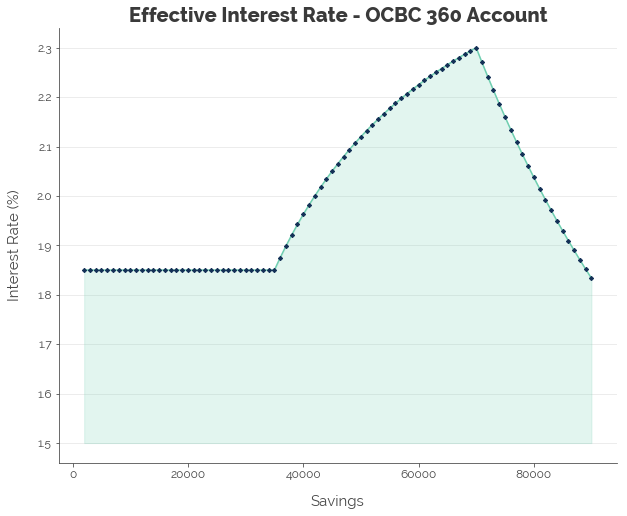

In [5]:
# CODE FOR CUSTOM GRAPHICS NOT INCLUDED

From the graph above, we see that the 360 account pays a stable **1.85%** until you have \$35,000 in savings. Once you cross that threshold, the interest rate shoots up to a peak of **2.30%** at savings of \$70,000 before dropping back down.  

## UOB One Account
Next, we compute the yield curve for the UOB One account, assuming we spend \$500 on UOB credit cards and either (1) credit our salary or (2) make three GIRO transactions.

In [6]:
# Set up table
uob = pd.DataFrame(np.arange(2000, 91000, 1000), columns = ['savings'])

# Compute base interest
uob['base_interest'] = uob.savings * 0.0005

# Create bracket
uob['bracket'] = 15000
uob['zero'] = 0

# Compute savings in excess of brackets
uob['f1'] = uob.savings - 0
uob['f2'] = uob.savings - 15000
uob['f3'] = uob.savings - 30000
uob['f4'] = uob.savings - 45000
uob['f5'] = uob.savings - 60000
uob['f6'] = uob.savings - 75000

uob['f1'] = uob[['f1', 'bracket']].min(axis = 1)
uob['f2'] = uob[['f2', 'bracket']].min(axis = 1)
uob['f3'] = uob[['f3', 'bracket']].min(axis = 1)
uob['f4'] = uob[['f4', 'bracket']].min(axis = 1)
uob['f5'] = uob[['f5', 'bracket']].min(axis = 1)
uob['f6'] = uob[['f6', 'bracket']].min(axis = 1)

# Create columns for savings within brackets
uob['s1'] = uob[['f1', 'zero']].max(axis = 1)
uob['s2'] = uob[['f2', 'zero']].max(axis = 1)
uob['s3'] = uob[['f3', 'zero']].max(axis = 1)
uob['s4'] = uob[['f4', 'zero']].max(axis = 1)
uob['s5'] = uob[['f5', 'zero']].max(axis = 1)
uob['s6'] = uob[['f6', 'zero']].max(axis = 1)

# Set up columns for bonus interest
uob['salary_giro'] = 0
uob['credit_cards'] = 0

# Compute interest for salary
uob.salary_giro = uob.s1 * 0.0035 + uob.s2 * 0.005 + uob.s3 * 0.0065 + \
    uob.s4 * 0.008 + uob.s5 * 0.0238

# Compute interest for credit cards
uob.credit_cards = 0.0145 * (uob.s1 + uob.s2 + uob.s3 + uob.s4 + uob.s5)

# Compute total interest
uob['total_interest'] = uob.base_interest + uob.salary_giro + uob.credit_cards

# Compute effective interest rate (EIR)
uob['eir'] = uob.total_interest / uob.savings

# Delete unnecessary columns
uob.drop(['s1', 's2', 's3', 's4', 's5', 's6', 
          'f1', 'f2', 'f3', 'f4', 'f5', 'f6'], axis = 1, inplace = True)

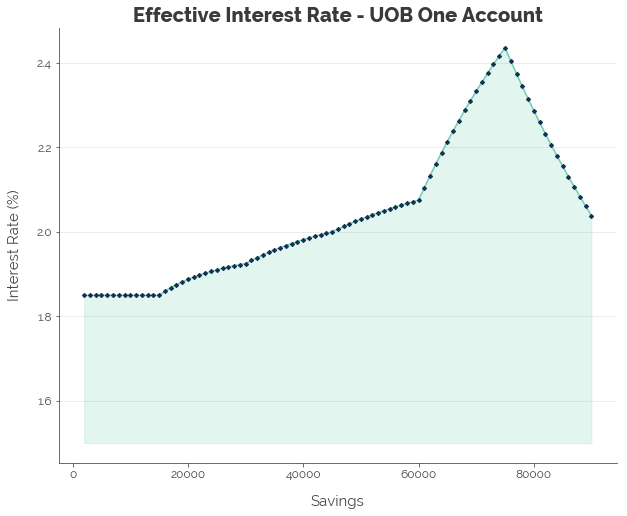

In [7]:
# CODE FOR CUSTOM GRAPHICS NOT INCLUDED

We see that there are minor jumps every \$15k as per their incentive structure, and a huge jump to a peak of **2.44%** for the \$75k bracket.

## MayBank SaveUp Account
MayBank's base interest rate varies with your savings balance, but its bonus interest rates do not. Hence, the overall interest rate is consistently high for savings up to \$60,000.

In [8]:
# Set up table
maybank = pd.DataFrame(np.arange(2000, 91000, 1000), columns = ['savings'])

# Create bonuses for base interest
maybank['zero'] = 0
maybank['base1'] = 3000
maybank['base2'] = 47000

maybank['b1'] = maybank.savings - 0
maybank['b2'] = maybank.savings - 3000
maybank['b3'] = maybank.savings - 47000

maybank['b1'] = maybank[['b1', 'base1']].copy().min(axis = 1)
maybank['b2'] = maybank[['b2', 'base2']].copy().min(axis = 1)

maybank['b2'] = maybank[['b2', 'zero']].copy().max(axis = 1)
maybank['b3'] = maybank[['b3', 'zero']].copy().max(axis = 1)

# Create brackets for bonuses
maybank['thresh'] = 60000
maybank['f1'] = maybank.savings - 0
maybank['f1'] = maybank[['f1', 'thresh']].copy().min(axis = 1)

# Calculate base interest
maybank['base_interest'] = maybank.b1 * 0.001875 + maybank.b2 * 0.0025 + \
    maybank.b3 * 0.003125

# Calculate interest from products
maybank['first_product'] = maybank.f1 * 0.003
maybank['second_product'] = maybank.f1 * 0.005
maybank['third_product'] = maybank.f1 * 0.0195

# Compute total interest
maybank['total_interest'] = maybank.base_interest + maybank.first_product + \
    maybank.second_product + maybank.third_product

# Compute effective interest rate (EIR)
maybank['eir'] = maybank.total_interest / maybank.savings

# Delete unnecessary columns
maybank.drop(['zero', 'base1', 'base2', 'b1', 'b2', 'b3', 'thresh',
             'f1'], axis = 1, inplace = True)

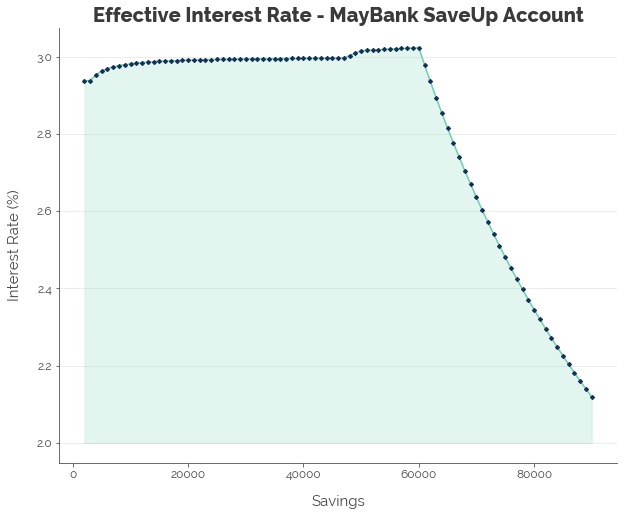

In [9]:
# CODE FOR CUSTOM GRAPHICS NOT INCLUDED

With the MayBank SaveUp account, we can hit a maximum of **3.02%** with savings of \$60,000.

## Comparison of Yield Curves [TLDR]

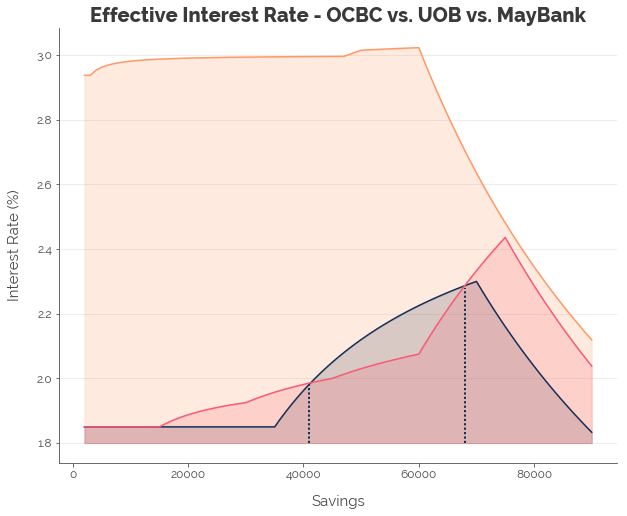

In [10]:
# CODE FOR CUSTOM GRAPHICS NOT INCLUDED

Comparing all three yield curves, it is clear that Maybank gives us the best interest rate across all levels of savings, assuming that we can capture all the bonus interest from MayBank. This provides us with three key insights:  
  
### Aim for MayBank First
If you have (1) a salary greater than \$2,000, (2) monthly expenses exceeding \$500 that can be paid via credit card, and (3) monthly bills totalling \$300 that can be paid via GIRO, dump your first \$60,000 in savings in **MayBank**.  
  
### Optimise Based on Amount of Savings
If you are drawing salary, you could go with either UOB or OCBC, depending on how much savings you have.  
  
1. **From \$0 to $15,000:** Go with *UOB*. Both UOB and OCBC offer the same interest rate. But, your bank balance is going to increase over time, and the bank that offers the best interest rate in the next bracket is...
2. **From \$15,000 to \$41,000:** *UOB*. This is because UOB increases the interest rate in brackets of \$15,000, while OCBC increases its rate once, at \$35,000. By the time your savings hits \$41,000, the benefits from the 360 overtakes the benefits from the One.
3. **From \$41,000 to \$68,000:** *OCBC*, because it pays an additional 0.9% of interest on the second \$35,000 you dump into your account.
4. **\$68,000 and Above:** *UOB*, because we hit the \$15,000 bracket that jumps 1.58% in interest from the previous bracket.  
  
Don't forget to sign up for a credit card and charge at least \$500 to it.
  
### There's Always *One* Way Out
If you are not drawing salary, *UOB* is your only option. If you have 3 bills to pay each month, your savings interest will still be higher than that of a 360 account for most savings levels. If you don't have 3 bills to pay each month, you can still collect 1.50% on the One account with a credit card spend of \$500.  

# Excess Savings
For families who (1) have sufficient expenditure to meet MayBank's three criteria and (2) have savings above \$60,000, it is fairly clear where your excess savings should go: **UOB**. Recall that UOB does not require that we credit our salary every month:  
  
| Transaction  | OCBC | UOB      | MayBank |
|--------------|------|----------|---------|
| Salary       | Yes  | Optional | Yes     |
| GIRO         | No   | Optional | Yes     |
| Credit Cards | Yes  | Yes      | Yes     |  
  
This means that the One account can be complementary to the SaveUp and 360 accounts, as long as we have (1) 3 bills to pay and (2) \$500 in credit card expenses.

# Conclusion
In conclusion, we established a hierarchy of bank accounts. MayBank is No. 1 with the highest interest, while UOB and OCBC come in at second, depending on the level of savings. A unique characteristic of UOB's One account is that it does not require us to credit our salary. This makes the One account an excellent option for any excess savings. All we need to do is sign up for a UOB credit card and charge \$500 to it, and pay 3 bills via GIRO if we have any other bills to spare. The interest from the One account will not be as high as that from the SaveUp account, but it is the next-best place to deposit your money.